In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np

### **CIFAR-10**

In [2]:
dataset = tf.keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

170498071/170498071 [==============================] - 21s 0us/step


In [4]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog","horse", "ship", "truck"]
labels_dict = {i:name for i, name in enumerate(labels)}

In [5]:
labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [6]:
 x_train.shape


(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
x_train, x_test = x_train/255, x_test/255

In [9]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation="relu"),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Conv2D(64, (2,2)),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation="relu"),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(32, activation="relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation="sigmoid")
])

In [10]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.01)


In [11]:
 model.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])


In [12]:
 history = model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=2000, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 59s 2s/step - loss: 2.3039 - accuracy: 0.1078 - val_loss: 2.2968 - val_accuracy: 0.1362
Epoch 2/10
25/25 [==============================] - 59s 2s/step - loss: 2.2981 - accuracy: 0.1163 - val_loss: 2.2919 - val_accuracy: 0.1429
Epoch 3/10
25/25 [==============================] - 49s 2s/step - loss: 2.2938 - accuracy: 0.1266 - val_loss: 2.2864 - val_accuracy: 0.1547
Epoch 4/10
25/25 [==============================] - 49s 2s/step - loss: 2.2893 - accuracy: 0.1337 - val_loss: 2.2800 - val_accuracy: 0.1818
Epoch 5/10
25/25 [==============================] - 57s 2s/step - loss: 2.2832 - accuracy: 0.1467 - val_loss: 2.2719 - val_accuracy: 0.2103
Epoch 6/10
25/25 [==============================] - 51s 2s/step - loss: 2.2766 - accuracy: 0.1513 - val_loss: 2.2628 - val_accuracy: 0.2272
Epoch 7/10
25/25 [==============================] - 47s 2s/step - loss: 2.2683 - accuracy: 0.1627 - val_loss: 2.2524 - val_accuracy: 0.2347
Epoch 8/10
25/25 [=============

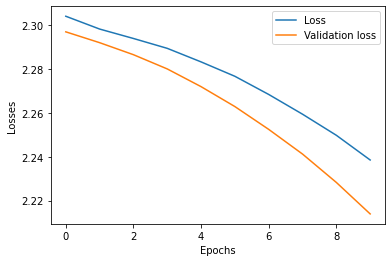

In [13]:
plt.figure()
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()


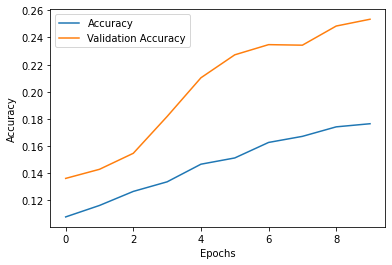

In [14]:
plt.figure()
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## **Prediction**

In [15]:
test = random.randint(1,10000)
test = x_test[:1]

In [16]:
test.shape

(1, 32, 32, 3)

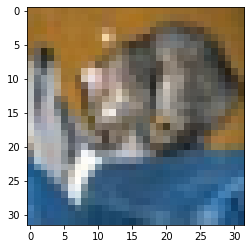

In [23]:
plt.imshow(test[0])

In [24]:
test.shape

(1, 32, 32, 3)

In [25]:
pred = model.predict(test)

1/1 [==============================] - 0s 19ms/step


In [26]:
pred = np.argmax(pred).astype("int32")

In [27]:
labels_dict[pred]

'dog'